(Deitel&Deitel 7.22) (Pandas: Series) Perform the following tasks with pandas Series:

a) Create a Series from the list [7,11,13,17].

b) Create a Series with five elements that are all 100.0.

c) Create a Series with 20 elements that are all random numbers in the range 0 to 100. Use method describe to produce the Series’ basic descriptive statistics.

d) Create a Series called temperatures of the floating-point values 98.6, 98.9, 100.2 and 97.9. Using the index keyword argument, specify the custom indices 'Julie', 'Charlie', 'Sam' and 'Andrea'.

e) Form a dictionary from the names and values in Part (d), then use it to initialize a Series.


In [ ]:
import pandas as pd
import random
l = [7,11,13,17]
a = pd.Series(l, copy=False)
b = pd.Series(100.0, range(5))
c = pd.Series([random.randint(0, 100) for x in range(20)]) # list comprehension
d = pd.Series([98.6, 98.9, 100.2, 97.9], index=[ 'Julie', 'Charlie', 'Sam', 'Andrea'])
dict1 = { 'Julie': 98.6, 'Charlie': 98.9, 'Sam': 100.2, 'Andrea': 97.9 }
e = pd.Series(dict1)
print(a, '\n')
print(b, '\n')
print(c, '\n')
print(d, '\n')
print(e)

0     7
1    11
2    13
3    17
dtype: int64 

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
dtype: float64 

0     89
1     43
2     71
3      8
4     81
5     78
6     82
7     31
8     69
9     41
10    48
11     6
12    33
13    47
14    24
15    14
16    63
17    11
18    74
19    74
dtype: int64 

Julie       98.6
Charlie     98.9
Sam        100.2
Andrea      97.9
dtype: float64 

Julie       98.6
Charlie     98.9
Sam        100.2
Andrea      97.9
dtype: float64


(Deitel&Deitel 7.23) (Pandas: DataFrames) Perform the following tasks with pandas DataFrames:

a) Createa DataFrame named temperatures from a dictionary of three temperature readings each for 'Maxine', 'James' and 'Amanda'.

b) Recreate the DataFrame temperatures in Part (a) with custom indices using the index keyword argument and a list containing 'Morning', 'Afternoon' and 'Evening'.

c) Select from temperatures the column of temperature readings for 'Maxine'.

d) Select from temperatures the row of 'Morning' temperature readings.

e) Select from temperatures the rows for 'Morning' and 'Evening' temperature readings.

f) Select from temperatures the columns of temperature readings for 'Amanda' and 'Maxine'.

g) Select from temperatures the elements for 'Amanda' and 'Maxine' in the 'Morning' and 'Afternoon'.

h) Use the describe method to produce temperatures’ descriptive statistics.

i) Transpose temperatures.

j) Sort temperatures so that its column names are in alphabetical order.

In [ ]:
dict1 = { 'Maxine': [92, 98, 94], 'James': [87, 95, 90], 'Amanda': [90, 98, 91] }
a = pd.DataFrame(dict1, index = ['Morning', 'Afternoon', 'Evening'])
c = a['Maxine']
d = a.loc['Morning']
e = a.loc[['Morning','Evening']]
f = a[['Maxine', 'Amanda']]
g = a[['Maxine', 'Amanda']].loc[['Morning','Evening']]
# pd.set_option('precision', 2)
h = a.describe()
i = a.T
j = a.sort_index(ascending = True)
k = a.sort_values(by='Morning', axis=1)
k

,James,Amanda,Maxine
Morning,87,90,92
Afternoon,95,98,98
Evening,90,91,94


(Aggarwal 2.3) Download the Arrythmia data set from the UCI Machine Learning Repository.

Normalize all records to a mean of 0 and a standard deviation of 1.

Discretize each numerical attribute into:

1.   10 equiwidth ranges.
2.   10 equidepth ranges.

Plot histograms of a few features in both cases (1) and (2). Results are coherent with your expectations?


In [ ]:
import numpy as np
import functools

mean = 0
stDev = 1
result = []

def clean(n):
  # make string values = 0
  try:
    return int(n)
  except:
    return 0

def clean2(n):
  # delete string values
  try:
    int(n)
    return True
  except:
    return False


with open('arrhythmia.data', mode='r') as data:
  total = 0
  totalClean = 0
  for record in data:
    values = record.split(',')
    # total += len(values)
    values = list(map(clean, values))
    # totalClean += len(values)
    normalized = list(map(lambda el: ((el - mean) / stDev), values)) # in pratica li stiamo lasciando tali e quali
    normalized.sort()
    result.append(normalized) # i keep the rows separated, every row is an attribute

number_of_range = 10

# discretization equi-depth
discr_results = []
discr_mean_results = []
for attr in result:
  n = int(round(len(attr) / number_of_range)) # 280 / 10 = 28
  new_attr = np.reshape(attr, (number_of_range,n))
  discr_mean_attr = [(functools.reduce(lambda x, y: x+y, range_attr) / len(range_attr)) for range_attr in new_attr]

  # print(len(discr_mean_attr))
  # print(discr_mean_attr)

  discr_results.append(new_attr)
  discr_mean_results.append(discr_mean_attr)


with open('discrete-mean-arrhythmia.data', mode='w') as afile:
  for x in discr_mean_results:
    afile.write(str(x))
    afile.write('\n')



In [ ]:
import numpy as np

# example on how to reshape
dd = [[0,1,2,3,4,5],[6,7,8,9,10,11],[12,13,14,15,16,17],[18,19,20,21,22,23]]
for r in dd:
  r2 = np.reshape(r, (2,3))
  print(r2, '\n')



SOLUTION

In [2]:
import pandas as pd
import numpy as np

labels=list(range(279)) + ['class']

df = pd.read_csv('arrhythmia.data', names=labels)

df


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [3]:
n_df=(df - df.mean(numeric_only=True)) / df.std(numeric_only=True)
n_df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,class
0,1.732520,-1.106294,0.640617,0.713024,0.135355,0.844010,0.113584,0.113683,1.200140,-1.093450,...,0.508280,-0.013824,0.278312,-0.079458,NaN,1.108325,1.176433,0.294277,1.077476,0.934735
1,0.578671,0.901919,-0.031962,-0.251365,-0.515501,0.420303,1.012179,-0.587912,-1.974876,-0.190991,...,0.508280,-0.157797,0.727766,-0.079458,NaN,-0.905886,0.615444,0.079525,0.504315,0.480922
2,0.457213,-1.106294,0.156360,1.617140,3.194376,0.174999,0.562881,0.422385,0.464465,1.371804,...,0.508280,0.130149,-0.470778,-0.079458,NaN,-0.618141,1.527052,-0.520301,1.055848,1.388549
3,0.517942,-1.106294,0.237069,1.556865,0.721125,1.044714,0.383162,0.254002,2.051973,-0.124957,...,0.508280,0.907606,-0.370899,-0.079458,NaN,-0.330397,0.966062,1.131071,1.737152,-0.653612
4,1.732520,-1.106294,0.640617,0.713024,-0.059902,0.576406,-0.215902,0.197875,0.503185,-1.093450,...,0.508280,1.166758,-1.070050,-0.079458,NaN,-1.769119,1.877670,0.449787,1.802039,0.707829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.396484,0.901919,-0.166478,0.110281,-0.580586,0.977813,0.443069,-0.447593,1.045261,-1.555685,...,0.508280,-1.367175,-1.769200,-0.079458,NaN,0.532836,-0.436411,-1.756979,-1.620707,-0.653612
448,-0.575178,-1.106294,0.640617,1.014396,0.721125,-0.404811,-0.185948,0.871406,-0.658406,1.151692,...,0.508280,1.886626,-0.071263,-0.079458,NaN,-0.330397,0.825815,1.382850,1.780410,1.388549
449,-0.635907,-1.106294,-0.005059,-0.010268,1.241809,0.464904,-0.066136,0.674960,1.006541,-2.612222,...,0.508280,2.088189,-13.554882,-0.079458,NaN,2.834791,-0.155917,-4.704271,-3.388855,-0.426705
450,-0.878822,0.901919,-0.300994,-0.793835,0.265526,-1.096123,0.562881,1.348491,-1.045603,0.447334,...,-0.220483,0.850017,0.378191,-0.079458,NaN,-0.042652,0.825815,0.420166,0.926075,-0.653612


In [ ]:
normalized_df = (df-df.mean(numeric_only=True))/df.std(numeric_only=True)
# normalizzazione colonna per colonna
# cioè ad ogni elemento viene sottratta la media della colonna e poi diviso per la dev st della stessa colonna
# numeric_only serve a sopprimere i warning

normalized_df.describe()

In [38]:
df.iloc[:, 13]
# ci da dei '?'. Dobbiamo ripulire il nostro dataset. Opzione: azzerare tutti i '?'

# data cleaning
for col in range(df.shape[1]):
  for row in range(df.shape[0]):
    if df.iat[row, col] == '?':
      df.iat[row, col] = 0
      # non viene memorizzato come zero numerico,
      # quindi poi devo castare tutto come float
df = df.astype(float)
normalized_df = (df - df.mean()) / df.std()
# normalized_df.describe()
normalized_df


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,class
0,1.732520,-1.106294,0.640617,0.713024,0.135355,0.844010,0.113584,0.113683,1.200140,-1.093450,...,0.508280,-0.013824,0.278312,-0.079458,NaN,1.108325,1.176433,0.294277,1.077476,0.934735
1,0.578671,0.901919,-0.031962,-0.251365,-0.515501,0.420303,1.012179,-0.587912,-1.974876,-0.190991,...,0.508280,-0.157797,0.727766,-0.079458,NaN,-0.905886,0.615444,0.079525,0.504315,0.480922
2,0.457213,-1.106294,0.156360,1.617140,3.194376,0.174999,0.562881,0.422385,0.464465,1.371804,...,0.508280,0.130149,-0.470778,-0.079458,NaN,-0.618141,1.527052,-0.520301,1.055848,1.388549
3,0.517942,-1.106294,0.237069,1.556865,0.721125,1.044714,0.383162,0.254002,2.051973,-0.124957,...,0.508280,0.907606,-0.370899,-0.079458,NaN,-0.330397,0.966062,1.131071,1.737152,-0.653612
4,1.732520,-1.106294,0.640617,0.713024,-0.059902,0.576406,-0.215902,0.197875,0.503185,-1.093450,...,0.508280,1.166758,-1.070050,-0.079458,NaN,-1.769119,1.877670,0.449787,1.802039,0.707829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.396484,0.901919,-0.166478,0.110281,-0.580586,0.977813,0.443069,-0.447593,1.045261,-1.555685,...,0.508280,-1.367175,-1.769200,-0.079458,NaN,0.532836,-0.436411,-1.756979,-1.620707,-0.653612
448,-0.575178,-1.106294,0.640617,1.014396,0.721125,-0.404811,-0.185948,0.871406,-0.658406,1.151692,...,0.508280,1.886626,-0.071263,-0.079458,NaN,-0.330397,0.825815,1.382850,1.780410,1.388549
449,-0.635907,-1.106294,-0.005059,-0.010268,1.241809,0.464904,-0.066136,0.674960,1.006541,-2.612222,...,0.508280,2.088189,-13.554882,-0.079458,NaN,2.834791,-0.155917,-4.704271,-3.388855,-0.426705
450,-0.878822,0.901919,-0.300994,-0.793835,0.265526,-1.096123,0.562881,1.348491,-1.045603,0.447334,...,-0.220483,0.850017,0.378191,-0.079458,NaN,-0.042652,0.825815,0.420166,0.926075,-0.653612


In [5]:
normalized_df.iloc[:, 13]

0      0.043841
1      0.043841
2      0.485056
3      0.043841
4      0.043841
         ...   
447    0.043841
448    0.043841
449    1.655234
450    2.019715
451    0.043841
Name: 13, Length: 452, dtype: float64

(array([  1.,   4.,  16.,  65., 137., 108.,  70.,  34.,   8.,   9.]),
 array([-3.54421594, -2.8641627 , -2.18410946, -1.50405622, -0.82400298,
        -0.14394974,  0.53610349,  1.21615673,  1.89620997,  2.57626321,
         3.25631645]),
 <BarContainer object of 10 artists>)

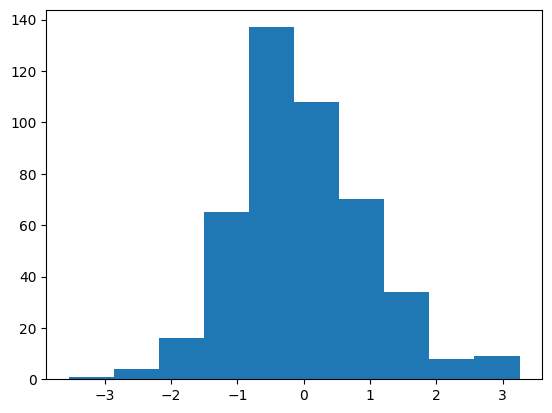

In [14]:
import matplotlib.pyplot as plt
plt.hist(normalized_df.iloc[:,178]) # 178 is the column

# ogni colonna è una feature, plottiamo l'istogramma di una feature
# i dati sono adesso tutti standardizzati
# adesso dovremmo discretizzarli

In [ ]:
# per completezza, normalizzazione min-max
normalized_df2 = (df - df.min(numeric_only=True)) / (df.max(numeric_only=True) - df.min(numeric_only=True))
normalized_df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,0.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,0.559894,0.550885,0.090649,0.365708,0.255040,0.296093,0.488115,0.226920,0.439046,0.603158,...,0.931956,0.383390,0.949045,0.004978,NaN,0.410882,0.601862,0.477640,0.440603,0.192035
std,0.198393,0.497955,0.055067,0.097593,0.115522,0.085577,0.120525,0.130524,0.125984,0.133230,...,0.133872,0.147155,0.070015,0.062648,NaN,0.108603,0.118838,0.101533,0.119702,0.293806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.433735,0.000000,0.081481,0.311765,0.187970,0.270992,0.425993,0.146520,0.385366,0.515396,...,0.896341,0.279661,0.926573,0.000000,NaN,0.375000,0.541667,0.418421,0.363430,0.000000
50%,0.566265,1.000000,0.087407,0.364706,0.233083,0.299618,0.487365,0.197802,0.443902,0.621701,...,1.000000,0.372881,0.961538,0.000000,NaN,0.406250,0.612500,0.468421,0.430421,0.000000
75%,0.698795,1.000000,0.096296,0.429412,0.293233,0.333969,0.548736,0.260073,0.497561,0.697947,...,1.000000,0.474576,1.000000,0.000000,NaN,0.468750,0.675000,0.526504,0.516019,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
import random

def discretize_column(df, col, nbin=10, mode='equiwidth'):
  if (mode == 'equiwidth'):
    range_val = df[col].max() - df[col].min()
    # range_val = df.iloc[:, col].max() - df.iloc[:, col].min()
    df[col] = ( df[col] - df[col].min() ) * nbin // range_val
    print(df[col])

  if (mode == 'equidepth'):
    print(df[col])
    bin_size = int(df[col].size // nbin) # 452 / 10 = 45 . '//' divide ed elimina resto
    sorted_val = df[col].sort_values()
    # print(sorted_val)
    intervals = [sorted_val.iat[0]]

    print(f'bin_size = {bin_size}')
    count = 0
    for d in sorted_val:
      count += 1
      if count > bin_size:
        count = 0
        intervals.append(d)

    intervals.append(d) # why ?
    print(intervals)

    for i in range(df[col].size):
      for j in range(1,len(intervals)):
        if df.iat[i, col] < intervals[j]:
          df.iat[i, col] = j
          break

    print(df[col])

In [67]:
from tabulate import tabulate

def discretize_array_equiwidth(arr, nbin=4):
  a = np.array(arr)
  range_val = a.max() - a.min()
  # range_val = df.iloc[:, col].max() - df.iloc[:, col].min()
  res = ( a - a.min() ) * nbin // range_val
  #   = (    x - 1    ) *  4   // 19
  for y in a:
    if (y < 10):
      print('0' + str(y), end=' ')
    else:
      print(y, end=' ')
  print('\n')
  for y in res:
    if (y < 10):
      print('0' + str(y), end=' ')
    else:
      print(y, end='-')
  # print(tabulate(arr, res))

l = range(1,21)
discretize_array_equiwidth(l)

01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 

00 00 00 00 00 01 01 01 01 01 02 02 02 02 02 03 03 03 03 04 

In [ ]:
discretize_column(normalized_df, 1, mode='equidepth')

In [ ]:
discretize_column(normalized_df, 275, 10, mode='equidepth')

(array([40., 20., 36., 72.,  1., 82., 57., 51., 41., 52.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

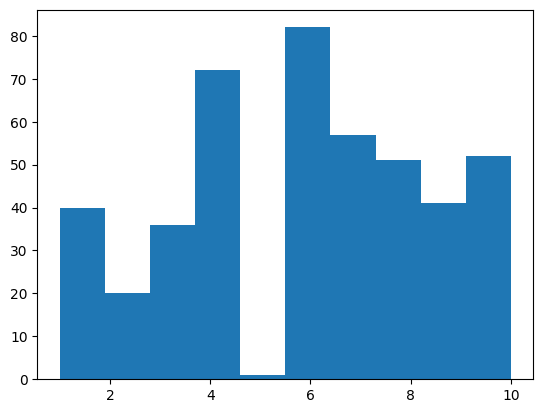

In [40]:
plt.hist(normalized_df[275], bins=10)

In [44]:
discretize_column(normalized_df, 178, 10, mode='equiwidth')

0      4.0
1      5.0
2      6.0
3      5.0
4      4.0
      ... 
447    3.0
448    6.0
449    0.0
450    6.0
451    5.0
Name: 178, Length: 452, dtype: float64


(array([  1.,   4.,  16.,  65., 135., 110.,  70.,  34.,   8.,   9.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

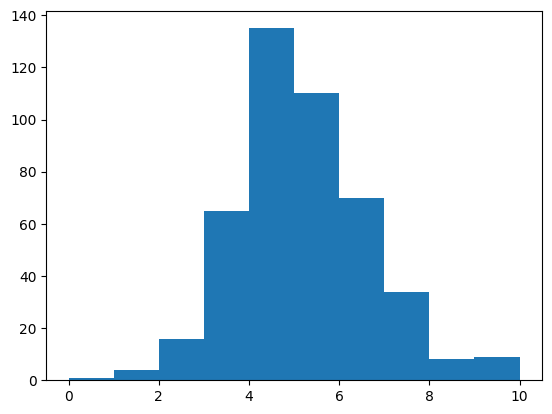

In [45]:
plt.hist(normalized_df[178], bins=10)